In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data

import seaborn as sns
import matplotlib.pyplot as plt


# using sf_temps data

In [2]:
df=data.sf_temps()

In [3]:
df_sf=data.sf_temps()

In [4]:
df_sf

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [5]:
df_sf.dtypes

temp           float64
date    datetime64[ns]
dtype: object

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
df_sf= df_sf.set_index('date').sort_index()
df_sf.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


In [7]:
df_sf['weekday_name']=df_sf.index.day_name()

In [8]:
df_sf.temp.mean()

56.92411234159169

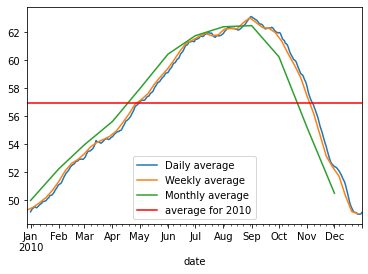

In [9]:
#df_sf.temp.plot(label = 'hourly')
df_sf.resample('D').mean().temp.plot(label='Daily average')
df_sf.resample('W').mean().temp.plot(label='Weekly average')
df_sf.resample('M').mean().temp.plot(label='Monthly average')
plt.axhline(y=np.nanmean(df_sf.temp), color = 'red', label = 'average for 2010')
plt.legend()
plt.show()

2. Write the code necessary to visualize the minimum temperature over time.

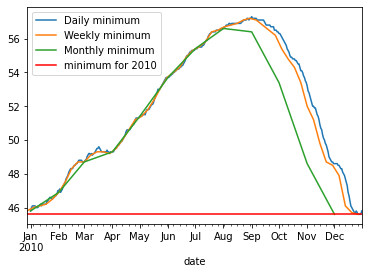

In [10]:
#df_sf.temp.plot(label = 'hourly')
df_sf.resample('D').min().temp.plot(label='Daily minimum')
df_sf.resample('W').min().temp.plot(label='Weekly minimum')
df_sf.resample('M').min().temp.plot(label='Monthly minimum')
plt.axhline(y=np.min(df_sf.temp), color = 'red', label = 'minimum for 2010')
plt.legend()
plt.show()

3. Write the code necessary to visualize the maximum temperature over time.


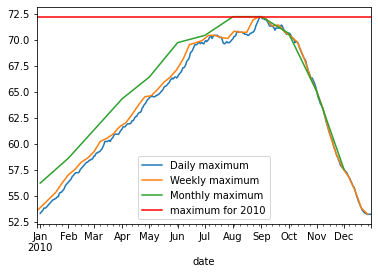

In [11]:
#df_sf.temp.plot(label = 'hourly')
df_sf.resample('D').max().temp.plot(label='Daily maximum')
df_sf.resample('W').max().temp.plot(label='Weekly maximum')
df_sf.resample('M').max().temp.plot(label='Monthly maximum')
plt.axhline(y=np.max(df_sf.temp), color = 'red', label = 'maximum for 2010')
plt.legend()
plt.show()

4. Which month is the coldest, on average?


In [12]:
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [13]:
df['Month']=df.date.dt.month

In [21]:
df.groupby('Month').min().sort_values('temp').head(1)

,temp,date
Month,,
12,45.6,2010-12-01


5. Which month has the hightest average temperature?

In [22]:
df.groupby('Month').max().sort_values('temp').head(1)

,temp,date
Month,,
1,56.2,2010-01-31 23:00:00


In [30]:
df.groupby('Month').max().sort_values('temp', ascending = False).head(2)

,temp,date
Month,,
8,72.2,2010-08-31 23:00:00
9,72.2,2010-09-30 23:00:00


6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

# using seattle weather data

In [31]:
seattle = data.seattle_weather()

In [39]:
seattle

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


1. Which year and month combination has the highest amount of precipitation?


In [34]:
seattle.set_index('date', inplace = True)

In [37]:
seattle.resample('M').precipitation.sum().max()

284.5

In [38]:
seattle.resample('M').precipitation.sum().idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')